In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [2]:
ROOT_PATH = "../../../desarrollo/"

csv_file = ROOT_PATH + "Data/Annotations/audio_annotations.csv"

audio_name = "AM1_20230515_060000.WAV"

In [3]:
# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/Images/"

In [4]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

In [5]:
filtered_df

,path,recorder,date,time,audio_duration,start_time,end_time,low_frequency,high_frequency,specie,bbox
0,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,0.000000,2.957143,6924.452637,12307.774414,quiroptera,"[0.024193548387096774, 0.05681034207524994, 0...."
1,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,0.865714,1.800000,3227.233154,5087.216797,unknown,"[0.021505376344086023, 0.1418762287726518, 0.0..."
2,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,4.174286,16.088571,7.065833,9697.166992,abiotic noise,"[0.1682795698924731, 0.4248727125761507, 0.198..."
3,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,15.960000,16.894286,3438.405056,5453.471119,unknown,"[0.2731182795698925, 0.1350115976397956, 0.015..."
4,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,23.434286,25.285714,2780.975830,5137.292969,alaudidae,"[0.4053763440860215, 0.1490571656861592, 0.030..."
5,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,55.731429,55.860000,6175.536621,11975.861328,unknown,"[0.9290322580645162, 0.06413452845820133, 0.00..."
6,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,52.314762,54.184377,3261.215820,5238.752930,alaudidae,"[0.8865591397849463, 0.13981909567558765, 0.03..."
7,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,45.473866,46.593912,3160.140137,5553.832520,alaudidae,"[0.7666666666666667, 0.1384285949335719, 0.019..."
8,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,37.099368,37.581850,2155.213135,2493.614746,unknown,"[0.6220430107526882, 0.19955667173513322, 0.00..."
9,AM1/2023_05_15/AM1_20230515_060000.WAV,AM1,2023/05/15,06:00:00,00:01:00,36.944285,38.805284,2903.033691,5607.948242,alaudidae,"[0.6306451612903226, 0.14231086380823663, 0.03..."


In [6]:
# Function to convert HH:MM:SS format to seconds
def hms_to_seconds(hms):
    if isinstance(hms, str):
        time_parts = hms.split(':')
        if len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds
    elif isinstance(hms, float):
        return float(hms)
    return None

In [7]:
filtered_df["path"][0].replace(".WAV", ".jpg")

'AM1/2023_05_15/AM1_20230515_060000.jpg'

In [8]:
image_path = ROOT_PATH + "Data/Dataset/Images/"
print(image_path)

../../../desarrollo/Data/Dataset/Images/


In [10]:
# Function to load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    print(audio_name)
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[0, img.shape[0]], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    #ax.legend(loc='best')
    ax.set_xlabel('Time (s')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print image compression
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')

    # Print images resolution
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".jpg")
load_and_display_image(image_path, df)


FileNotFoundError: [Errno 2] No such file or directory: '../../../desarrollo/Data/Dataset/Images/AM1/2023_05_15/AM1_20230515_060000.jpg'

In [11]:
'''sample_audio = ROOT_PATH + "Data/Dataset/Audios/" + filtered_df["path"][0]

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(sample_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")'''

MIN_FREQUENCY = 1
MAX_FREQUENCY = 16000

In [12]:
image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".jpg")
img = plt.imread(image_path)
print(img.shape[0])

462


0 45 12.521167441305465 39.971588636225476
13 27 54.68672619100141 76.40690919492886
64 249 23.898818389810458 368.6835680305528
247 261 51.36877605604724 73.38194016312389
363 391 54.219235161889515 83.50958593212158
863 865 13.825892167860331 45.4344121275177
810 839 53.28585658291058 75.9069878213324
704 722 50.49845601520684 77.40956570341359
575 582 88.7149440003368 95.6754206829263
572 601 50.03567604629035 81.4595621125203


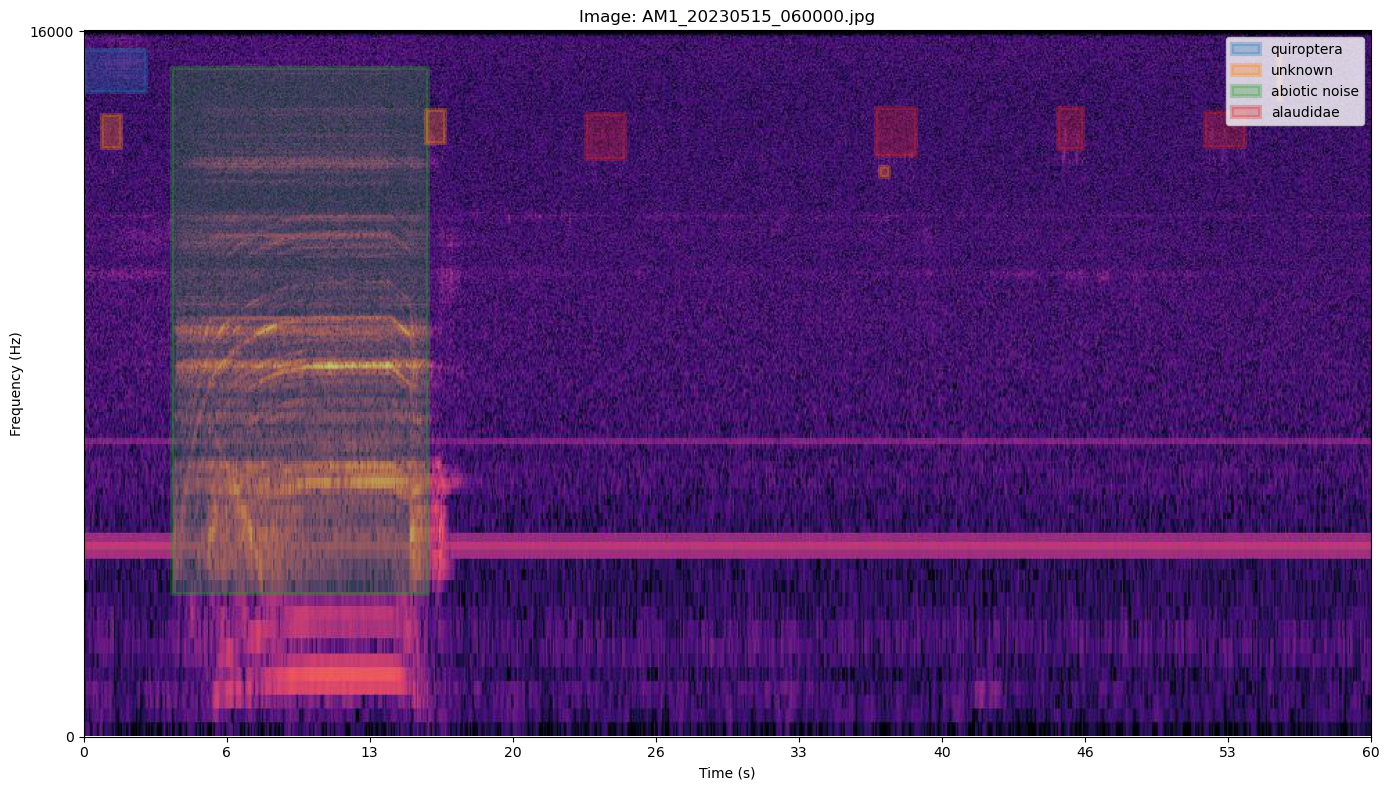

In [22]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Calculate vertical coordinates based on frequency range (0 to MAX_FREQUENCY)
            if low_frequency == 0:
                bottom = 0
            else:
                # bottom = float(((2595 * math.log(1 + (low_frequency/700), 10))) * img.shape[0])
                bottom = float(np.log(low_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            if high_frequency == MAX_FREQUENCY:
                top = MAX_FREQUENCY
            else:
                # top = float(((2595 * math.log(1 + (high_frequency/700), 10))) * img.shape[0])
                top = float(np.log(high_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            # Invert the y-coordinates
            bottom, top = img.shape[0] - top, img.shape[0] - bottom

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".jpg")
load_and_display_image(image_path, df)


In [13]:
# List image files in the Images directory
image_files = [os.path.join(image_root_directory, file) for file in os.listdir(image_root_directory) if file.endswith('.jpg')]

# Display each image along with annotations
for image_path in image_files:
    load_and_display_image(image_path, df)